# Alcohol

## reference

In [391]:
# https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

## Import Libraries

In [392]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,  BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Import Data

In [393]:
path1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/portuguese.csv'
path2 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/maths.csv'
portuguese = pd.read_csv(path1)
math = pd.read_csv(path2)

In [394]:
portuguese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [395]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## join the two data together

In [396]:
m,n = math.shape
m1,n1 = portuguese.shape

#  add each subject to each profile 
subject = ['math']*m
math['subject'] = subject

subject1 = ['portuguese']*m1
portuguese['subject'] = subject1

# join the two dataframe together
p_m = pd.concat([math, portuguese])
p_m

# shuffle all rows in the pM dataframe
p_m = p_m.sample(frac = 1).reindex()

## Split variables and targets

In [397]:
cond1 = p_m.columns == 'G1'
cond2 = p_m.columns == 'G2'
cond3 = p_m.columns == 'G3'
v_n = p_m.columns[~cond1 & ~cond2 & ~cond3] 
X = p_m[v_n]


In [403]:
y_name = ['G3']
y = p_m[y_name]
y = np.ravel(y)

## reset labels for y

## change type in X

In [404]:
# random forest can't cope with string, convert string to int category
object_name = X.select_dtypes(object).columns
X[object_name] = X.select_dtypes(object).apply(LabelEncoder().fit_transform)

## Visual

In [400]:
X.school

372    1
633    1
46     0
194    0
57     0
      ..
190    0
269    0
241    0
278    0
596    1
Name: school, Length: 1044, dtype: int32

TypeError: 'module' object is not callable

## Split the data into training and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

## Feature selection

In [ ]:
# random forest to select features
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
model = SelectFromModel(rf.fit(X_train, y_train))

In [ ]:
model.get_support()

array([False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True])

In [ ]:
# important features
important_f = X_train.columns[model.get_support()]

## Remove unimportant features

In [ ]:
X1_train = X_train[important_f]
y1_train = y_train
X1_test = X_test[important_f]
y1_test = y_test

## Bagging 

In [ ]:
model1 = BaggingClassifier()
# model1.fit(X1_train, y1_train['G1'])

In [ ]:
# model1.fit(X1_train, y1_train['G2'])

In [ ]:
model1.fit(X1_train, y1_train)

BaggingClassifier()

In [ ]:
# predict the lables for test
y_pred = model1.predict(X1_test)

## confusion metrics

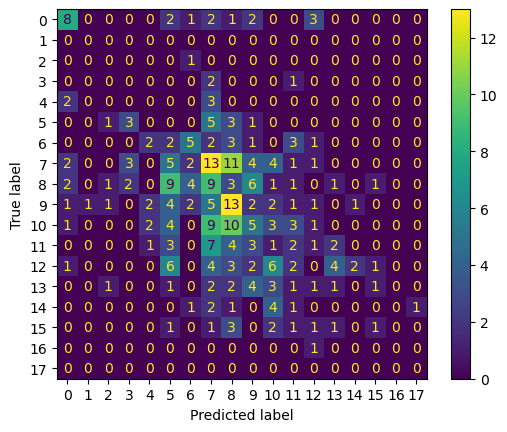

In [ ]:
cm = confusion_matrix(y1_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

## Accuracy

In [ ]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44        19
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        13
           9       0.31      0.26      0.29        19
          10       0.20      0.28      0.23        46
          11       0.05      0.07      0.06        40
          12       0.07      0.06      0.06        36
          13       0.12      0.08      0.09        38
          14       0.12      0.08      0.10        24
          15       0.00      0.00      0.00        31
          16       0.11      0.06      0.08        17
          17       0.00      0.00      0.00        10
          18       0.25      0.09      0.13        11
          19       0.00      0.00      0.00         1
          20       0.00    

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\

## DEcision Tree

In [ ]:
model2 = DecisionTreeClassifier(criterion ='gini', splitter = 'best')
model2.fit(X1_train, y1_train)

DecisionTreeClassifier()

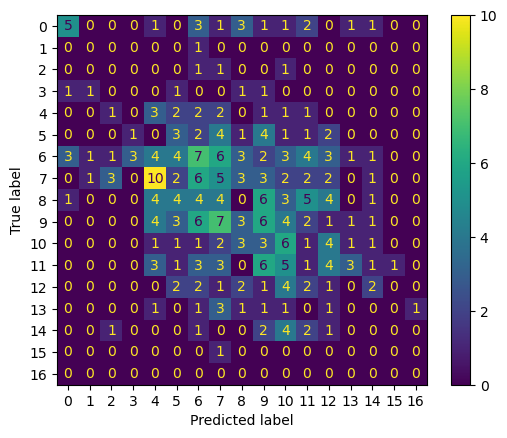

In [ ]:
y_pred = model2.predict(X1_test)
dis2 = ConfusionMatrixDisplay(confusion_matrix(y1_test, y_pred))
dis2.plot()

## Accuracy

In [ ]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        19
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.10      0.23      0.14        13
           9       0.13      0.16      0.14        19
          10       0.17      0.15      0.16        46
          11       0.12      0.12      0.12        40
          12       0.00      0.00      0.00        36
          13       0.16      0.16      0.16        38
          14       0.17      0.25      0.20        24
          15       0.04      0.03      0.04        31
          16       0.04      0.06      0.05        17
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0

    accuracy              

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
18*18

324